In [37]:
import pandas as pd
import numpy as np

In [38]:
data = pd.read_csv('iris.csv')

In [39]:
data.shape

(150, 6)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [41]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [42]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [43]:
X = data.iloc[:,:-1].values #last column values excluded

In [44]:
y = data.iloc[:,-1].values #last column value

In [45]:
#Splitting the dataset into the Training set and Test set

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)  

In [49]:
len(x_test)

30

In [26]:
from sklearn.tree import   DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [27]:
classifier   = DecisionTreeClassifier()

In [28]:
#training the classifier
classifier.fit(x_train,y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
#making precdictions
y_pred   = classifier.predict(x_test) 

In [50]:
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [51]:
#Accuracy   score
print('accuracy   is',accuracy_score(y_pred,y_test)*100) 

accuracy   is 96.66666666666667


In [52]:
#to evaluate the quality of the output
print(confusion_matrix(y_test, y_pred)) 

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


In [32]:
#Summary of the predictions made by the   classifier
print(classification_report(y_test,   y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30



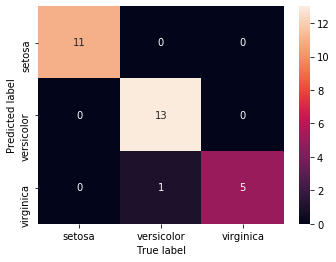

In [53]:
#Visualizing Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm  = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,index = ['setosa','versicolor','virginica'], columns = ['setosa','versicolor','virginica'])
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df,   annot=True)
plt.ylabel('Predicted label')
plt.xlabel('True label')
plt.show()
